In [15]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [8]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df["PRICE"]  = boston_data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Train Test Split

In [12]:
x = df.drop("PRICE",axis = 1)
y = df["PRICE"]

In [13]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [23]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: PRICE, Length: 404, dtype: float64

# Model Training

In [63]:
knn_reg = KNeighborsRegressor(n_neighbors=5,p=1) #k=5
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(p=1)

# Evalaution

In [64]:
y_pred = knn_reg.predict(x_test)
y_pred[:5]

array([24.5 , 30.26, 13.46, 28.  , 17.16])

In [65]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64

In [66]:
# Testing Data Evalaution

mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R2 Score :",r2_value)

MSE: 22.02435294117647
RMSE : 4.693011074052188
MAE : 3.3298039215686273
R2 Score : 0.6996697566655379


In [67]:
#Training

y_pred_train = knn_reg.predict(x_train)



mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R2 Score :",r2_value)

MSE: 23.512329702970295
RMSE : 4.8489514024137526
MAE : 3.2943069306930695
R2 Score : 0.729349505538192


In [68]:
k_values = range(2,21)
list(k_values)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [73]:
r2_train_list = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
r2_train_list

[0.8756047377599658,
 0.8009280643714729,
 0.7693830411371629,
 0.729349505538192,
 0.7332867791667685,
 0.7087405125741333,
 0.6888339839128826,
 0.6642760472865272,
 0.6531042240542401,
 0.6250172515195147,
 0.6039764120977615,
 0.5873369523903496,
 0.575633762793898,
 0.5546731649863051,
 0.5379013802893736,
 0.5290972164864668,
 0.5182965554327188,
 0.5052839337635577,
 0.4931182031916955]

In [74]:
r2_test_list = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
    
r2_test_list

[0.7183847488195653,
 0.6658276588461036,
 0.7036417744134631,
 0.6996697566655379,
 0.6670584519500081,
 0.6487605032986827,
 0.6366952432188604,
 0.6241796671374094,
 0.6143287427145383,
 0.6236661834498612,
 0.6235723754822657,
 0.6160319727029525,
 0.6058510685352474,
 0.6026116532681434,
 0.5841020456051781,
 0.5777252508942756,
 0.5867078852049729,
 0.5822202511988228,
 0.5799892842352807]

Text(0.5, 1.0, 'Comparision Between Train and Test R2 Score')

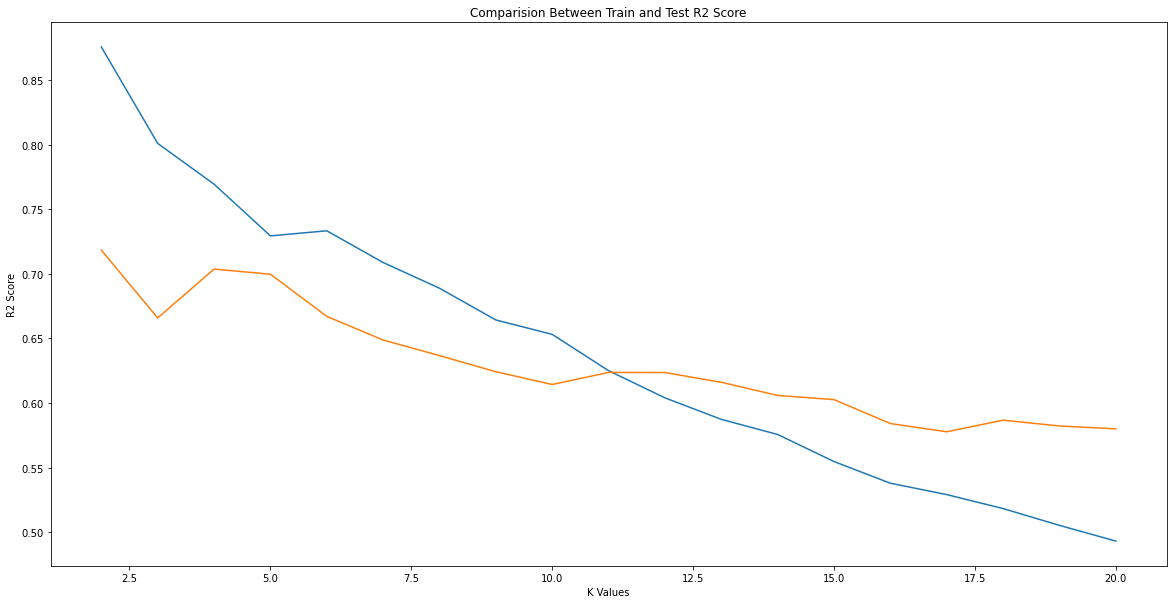

In [79]:
plt.figure(figsize=(20,10))

plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)

plt.xlabel("K Values")
plt.ylabel("R2 Score")
plt.title("Comparision Between Train and Test R2 Score")

In [ ]:
Selecting  Value ok k = 5 >> From graph

# For P = 2

Text(0.5, 1.0, 'Comparision Between Train and Test R2 Score')

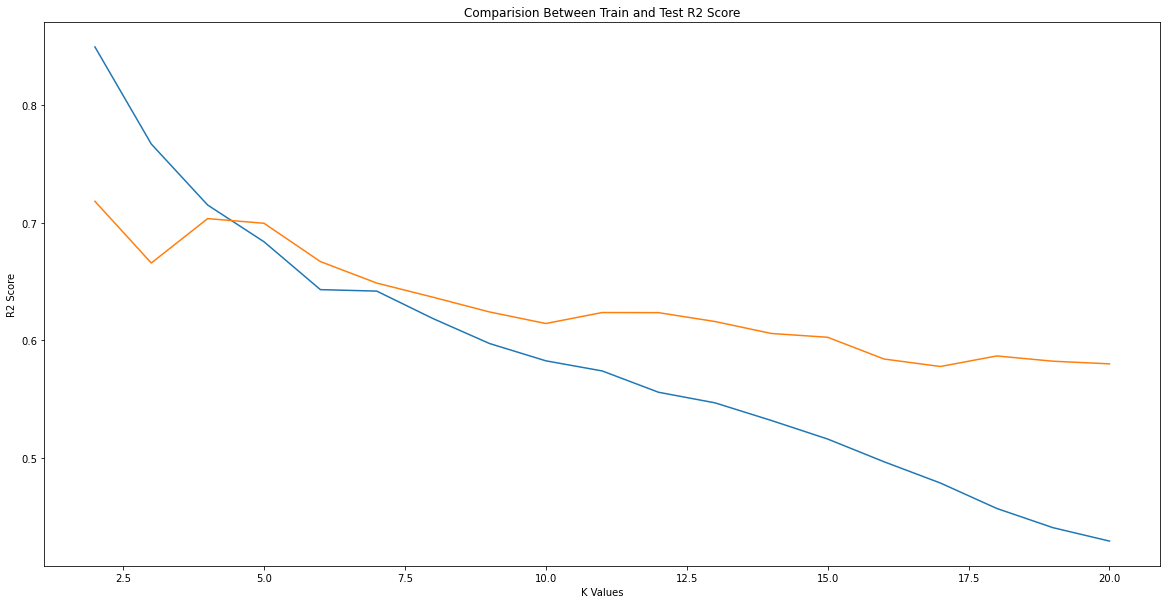

In [81]:
r2_train_list1 = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list1.append(r2_train)
    
r2_test_list1 = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list1.append(r2_test)
    

plt.figure(figsize=(20,10))

plt.plot(k_values,r2_train_list1)
plt.plot(k_values,r2_test_list1)

plt.xlabel("K Values")
plt.ylabel("R2 Score")
plt.title("Comparision Between Train and Test R2 Score")

# Model Train

In [85]:
knn_reg = KNeighborsRegressor(n_neighbors=4,p=2)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [86]:
# Testing Data Evalaution
y_pred = knn_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R2 Score :",r2_value)

MSE: 24.07094362745098
RMSE : 4.906214796301827
MAE : 3.646078431372549
R2 Score : 0.6717618730397847


In [87]:
#Training

y_pred_train = knn_reg.predict(x_train)



mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R2 Score :",r2_value)

MSE: 24.74137221534653
RMSE : 4.9740699849666905
MAE : 3.44684405940594
R2 Score : 0.715201993662872


# Preprocessing

In [88]:
x = df.drop("PRICE",axis = 1)
y = df["PRICE"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [89]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [90]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# 1. Normalization

In [94]:
# Only on Traing Data
normal_scaling = MinMaxScaler()
normal_scaling.fit(x_train)  # We are storing maximum and minimum vcalues

normal_train_df = pd.DataFrame(normal_scaling.transform(x_train),columns=x_train.columns)
normal_train_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322


# Without Hyperparameter Tuning

In [96]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(normal_train_df,y_train)

#Training

y_pred_train = knn_reg.predict(normal_train_df)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R2 Score :",r2_value)

MSE: 13.918433663366336
RMSE : 3.730741704187833
MAE : 2.421188118811881
R2 Score : 0.8397848702909227


In [97]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86


In [100]:
array = normal_scaling.transform(x_test)
noraml_test_df = pd.DataFrame(array,columns=x_test.columns)
noraml_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000930,0.0,0.122593,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711
1,0.000533,0.4,0.210000,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
2,0.001087,0.0,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
3,0.000928,0.0,0.372963,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
4,0.057112,0.0,0.642963,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.211336,0.0,0.642963,0.0,0.436214,0.155583,1.000000,0.038584,1.000000,0.914122,0.808511,0.071789,0.900662
98,0.161989,0.0,0.642963,0.0,0.730453,0.528371,0.930999,0.079386,1.000000,0.914122,0.808511,0.068511,0.450331
99,0.157830,0.0,0.642963,0.0,0.436214,0.568233,1.000000,0.036183,1.000000,0.914122,0.808511,0.087574,0.537804
100,0.000481,0.0,0.138889,0.0,0.131687,0.437665,0.434604,0.299866,0.086957,0.114504,0.627660,0.997705,0.307119


In [101]:
#Testing Data Evaluation

In [102]:
# Testing Data Evalaution
y_pred = knn_reg.predict(noraml_test_df)
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R2 Score :",r2_value)

MSE: 21.7121843137255
RMSE : 4.659633495643783
MAE : 2.6566666666666676
R2 Score : 0.7039265754739785


# find Best Value of k

Text(0.5, 1.0, 'Comparision Between Train and Test R2 Score')

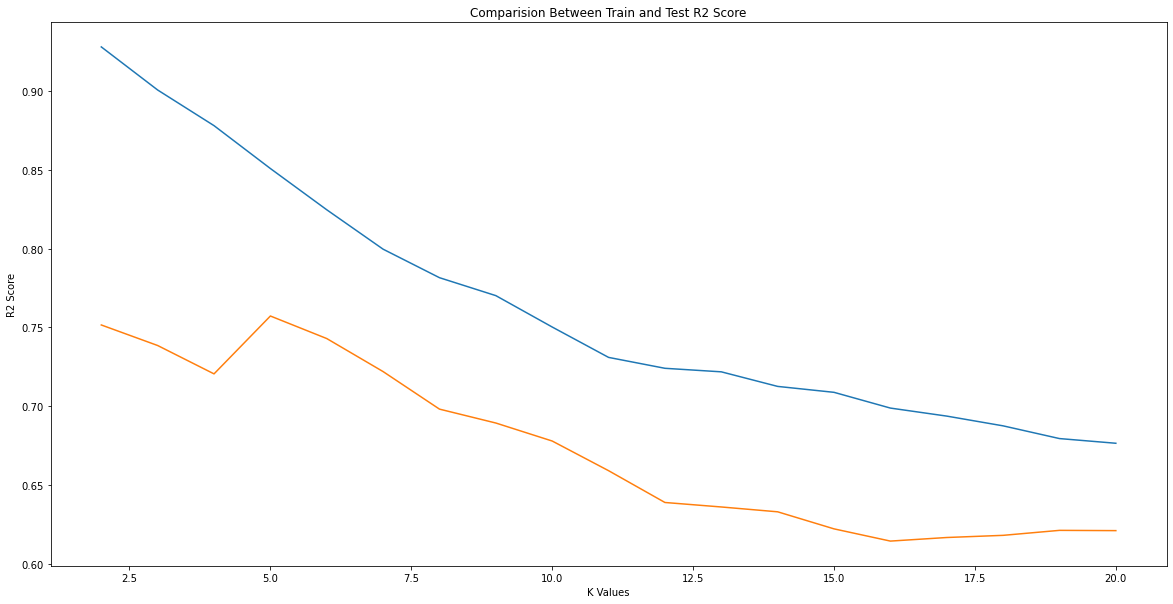

In [105]:
r2_train_list1 = []
r2_test_list1 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(normal_train_df,y_train)
    r2_train = knn_reg.score(normal_train_df,y_train)
    r2_train_list1.append(r2_train)

    r2_test = knn_reg.score(noraml_test_df,y_test)
    r2_test_list1.append(r2_test)
    

plt.figure(figsize=(20,10))

plt.plot(k_values,r2_train_list1)
plt.plot(k_values,r2_test_list1)

plt.xlabel("K Values")
plt.ylabel("R2 Score")
plt.title("Comparision Between Train and Test R2 Score")

In [ ]:
k = 5

# NOW FOR Std_Scalar

In [106]:
# Only on Traing Data
std_scaling = StandardScaler()
std_scaling.fit(x_train)  # We are storing maximum and minimum vcalues

std_train_df = pd.DataFrame(std_scaling.transform(x_train),columns=x_train.columns)
std_train_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
